# Task 2- Technohacks  Diabetes Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
data=pd.read_csv("diabetes.csv")

In [5]:
# Calculate the correlation between each feature and the target column (Outcome)
correlations = data.corr()['Outcome']

correlations_sorted = correlations.sort_values()

print(correlations_sorted)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [6]:
data.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [7]:
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [8]:
# Summary statistics
print(data.describe())

       Pregnancies     Glucose     Insulin         BMI  \
count   768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   79.799479   31.992578   
std       3.369578   31.972618  115.244002    7.884160   
min       0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000    0.000000   27.300000   
50%       3.000000  117.000000   30.500000   32.000000   
75%       6.000000  140.250000  127.250000   36.600000   
max      17.000000  199.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max          

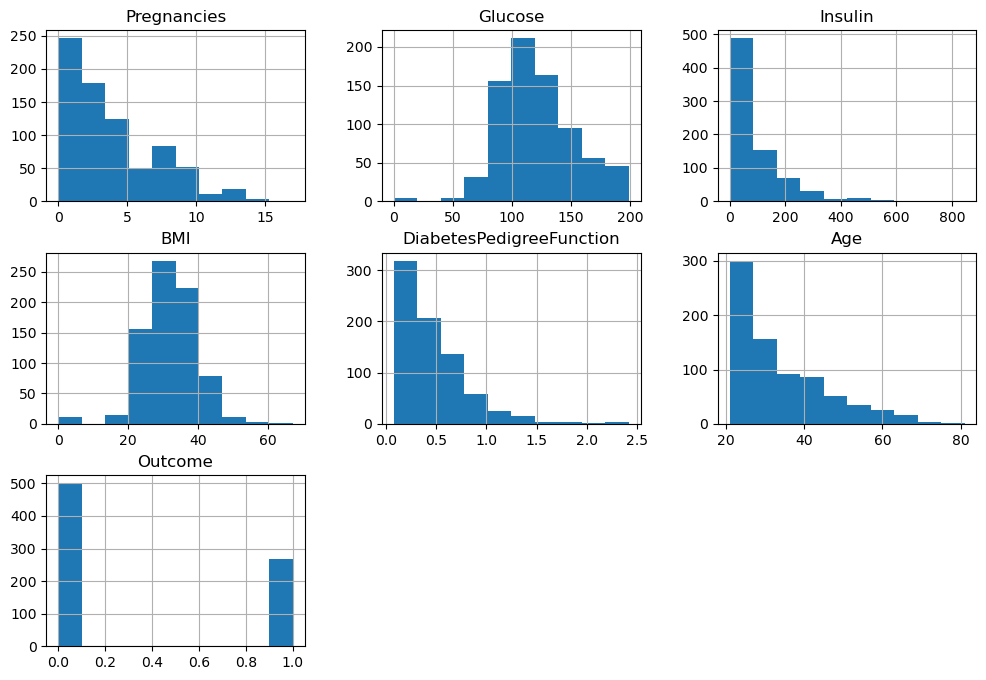

In [9]:
# Histogram for numeric variables
data.hist(bins=10, figsize=(12, 8))
plt.show()


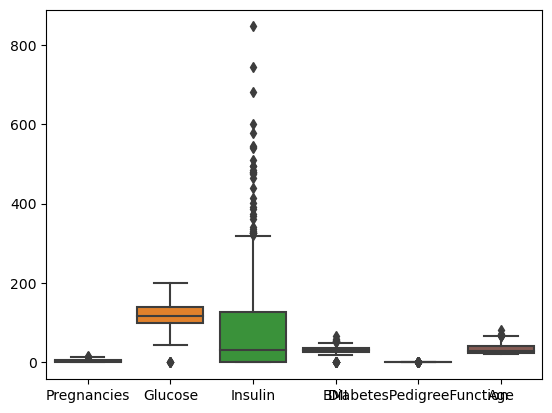

In [10]:
# Box plot for numeric variables
sns.boxplot(data=data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.show()

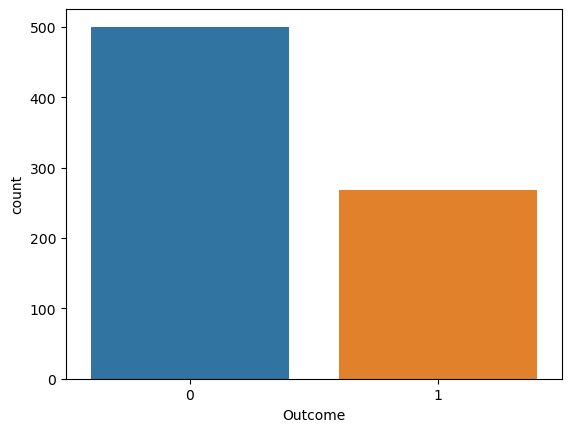

In [11]:
# Count plot for the target variable
sns.countplot(x='Outcome', data=data)
plt.show()

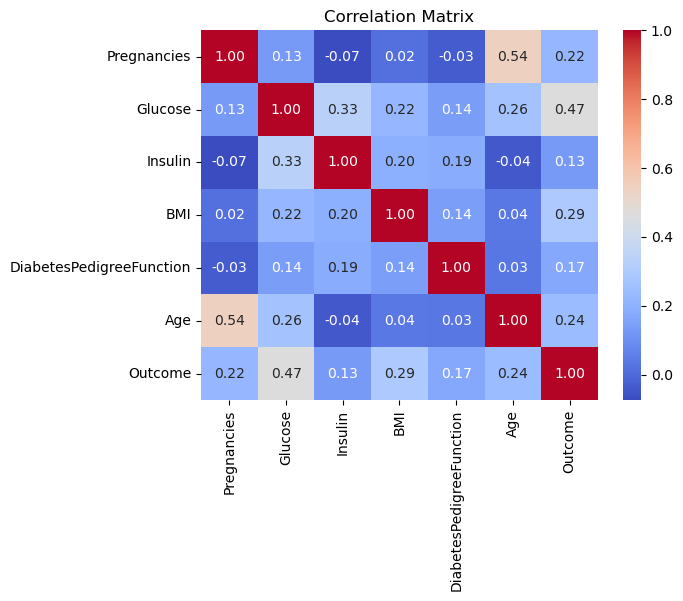

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
Name: Outcome, dtype: float64


In [12]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable (Outcome)
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_target)


In [13]:
# Impute missing values with mean
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['Insulin'].fillna(0, inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].mean(), inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [15]:
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.198582,0.642325,0.943638,0.200000,1


In [16]:
# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [17]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create a logistic regression model
model = LogisticRegression()

In [19]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7662337662337663


In [22]:
# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [23]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[86 13]
 [23 32]]


In [24]:
# New data point to predict (similar format as the training data)
new_data = {
    'Pregnancies': 3,
    'Glucose': 150,
    'Insulin': 0,
    'BMI': 33.5,
    'DiabetesPedigreeFunction': 0.600,
    'Age': 40
}

In [25]:
# Convert the new data point to a DataFrame
new_data_df = pd.DataFrame([new_data])


In [26]:
# Make the prediction using the trained model
prediction = model.predict(new_data_df)
print(prediction)

[1]


In [27]:
# Print the prediction
if prediction[0] == 1:
    print("The person has diabetes")
else:
    print("The person doesnot has diabetes")

The person has diabetes
